In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset
data = pd.read_csv("Groceries_dataset.csv", header=None)
print(data.head())

               0           1                 2
0  Member_number        Date   itemDescription
1           1808  21-07-2015    tropical fruit
2           2552  05-01-2015        whole milk
3           2300  19-09-2015         pip fruit
4           1187  12-12-2015  other vegetables


In [3]:
transactions = []
for i in range(len(data)):
    transactions.append([str(data.values[i, j]) for j in range(len(data.columns)) if str(data.values[i, j]) != 'nan'])

In [4]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [5]:
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
print(frequent_itemsets.head())

      support            itemsets
756  0.064541        (whole milk)
712  0.048960  (other vegetables)
727  0.044266        (rolls/buns)
737  0.039055              (soda)
757  0.034412            (yogurt)


In [6]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
print(frequent_itemsets[frequent_itemsets['length'] > 1].head())

Empty DataFrame
Columns: [support, itemsets, length]
Index: []


In [7]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = rules.sort_values(by=['lift', 'confidence'], ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


C:\Users\anves\AppData\Local\Temp\ipykernel_6180\3169363678.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\anves\AppData\Local\Temp\ipykernel_6180\3169363678.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


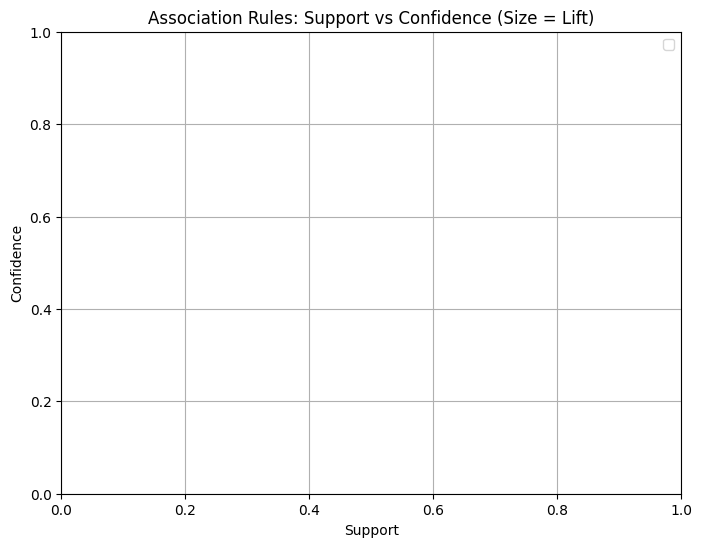

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rules,
    x='support',
    y='confidence',
    size='lift',
    hue='lift',
    palette='coolwarm',
    alpha=0.7,
    sizes=(50, 400)
)
plt.title('Association Rules: Support vs Confidence (Size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.grid(True)
plt.show()
